In [ ]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    # activation function where output is 1 if >= 0 and 0 if < 0
    def activation_function(self, X_input):
        return np.where(X_input >= 0, 1, 0)

    def fit(self, X_input, y_predict):

        # define features and feature valies
        n_samples, n_features = X_input.shape

        # define weight and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # training loop
        for _ in range(self.n_iterations):

          # interate through summation function and activation function (also include error handling)  (xiwi) + b = summation function
          for i, x_input_i in enumerate(X_input):
              # summation funtion
              summation_function_output = np.dot(x_input_i, self.weights) + self.bias

              # send output of summation function to the activation function
              y_predicted = self.activation_function(summation_function_output)

              # error handling, training data should autocorrect itself
              if y_predict[i] != y_predicted:
                update = self.learning_rate * (y_predict[i] - y_predicted)
                self.weights += update * x_input_i
                self.bias += update

    def predict(self, X_input):
      summation_function_output = np.dot(X_input, self.weights) + self.bias
      return self.activation_function(summation_function_output)


In [ ]:
# XOR dataset
X_input = np.array([[0, 0], [0,1], [1, 0], [1, 1]])

"""
XOR

0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1

"""

y_predict = np.array([0,1,1,1])

In [ ]:
perceptron = Perceptron()

perceptron.fit(X_input, y_predict)

In [ ]:
predictions = perceptron.predict(X_input)

# print outputs
print(f"predictions: {predictions}")
print(f"actuals: {y_predict}")
print(f"accuracy: {np.mean(predictions == y_predict)}")

predictions: [0 1 1 1]
actuals: [0 1 1 1]
accuracy: 1.0


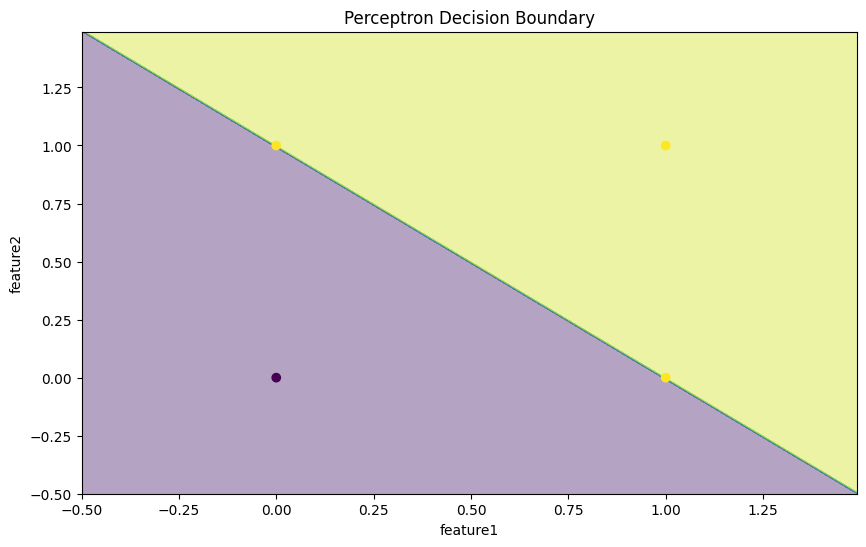

In [ ]:
def plot_decision_boundary(X_input, y_predict, perceptron):
  #set up a grid of points
  x_min, x_max = X_input[:, 0].min() - 0.5, X_input[:, 0].max() + 0.5
  y_min, y_max = X_input[:, 1].min() - 0.5, X_input[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  #create mesh grid
  Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #plot the decision boundary and training points
  plt.figure(figsize=(10, 6))
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X_input[:, 0], X_input[:, 1], c=y_predict, cmap='viridis')
  plt.xlabel('feature1')
  plt.ylabel('feature2')
  plt.title('Perceptron Decision Boundary')

plot_decision_boundary(X_input, y_predict, perceptron)
plt.show()